# Descrição do Projeto

# Configuração de Ambiente

In [10]:
# Instalação do pacote MySQL do Python

!pip install mysql-connector-python

In [11]:
# Importação do conector do MySQL

import mysql.connector

In [21]:
# Conexão com MySQL

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "S@kura22",
    database = "polimero"
)


# Função para executar consultas SQL
def execute_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()
    return result

# Início das Análises

## Exploração dos Dados

In [14]:
# Bibliotecas
# ===========

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
# Exemplo: Consulta para recuperar dados da tabela Cliente

query_cliente = "SELECT * FROM Cliente;"
cliente_data = execute_query(query_cliente)

for row in cliente_data:
    print(row)

(1, 'Desenvolvimento de Engenharia Industrial Ltda', '98.765.432/0001-98', '987654321', '12345678', '(84) 99876-5432', 4789, 4789, 6, 115567, 115567)
(2, 'Desenvolvimento de Equipamentos Industriais Ltda', '32.109.876/0001-61', '321098765', '76543210', '(13) 65432-1098', 4961, 4961, 6, 253427, 253427)
(3, 'Desenvolvimento de Materiais Avancados Ltda', '34.567.890/0001-40', '345678901', '98765432', '(64) 76543-2109', 4667, 4667, 5, 199382, 199382)
(4, 'Desenvolvimento de Polimeros de Alta Performance Ltda', '43.210.987/0001-50', '432109876', '9876543', '(64) 21098-7654', 2856, 2856, 6, 152786, 152786)
(5, 'Desenvolvimento de Polimeros Especiais em Engenharia Ltda', '43.210.987/0001-09', '432109876', '9876543', '(64) 21098-7654', 2856, 1256, 6, 152786, 152780)
(6, 'Desenvolvimento de Solucoes em Polimeros Ltda', '89.123.456/0001-96', '891234567', '54321098', '(24) 65432-1098', 476, 476, 3, 25315, 25315)
(7, 'Desenvolvimento de Solucoes Industriais Ltda', '12.345.678/0001-16', '123456789'

In [31]:
tabelas = ['Grupo','UF','Municipio','Endereco','Transportadora','Familia','Linha','Produto','Operacao','Uso','PedidoVendaItem','PedidoVenda','log']

In [32]:
grupo_data = execute_query('SELECT * FROM Grupo;')

uf_data = execute_query('SELECT * FROM UF;')

mun_data = execute_query('SELECT * FROM Municipio;')

end_data = execute_query('SELECT * FROM Endereco;')

tran_data = execute_query('SELECT * FROM Transportadora;')

fam_data = execute_query('SELECT * FROM Familia;')

linha_data = execute_query('SELECT * FROM Linha;')

prod_data = execute_query('SELECT * FROM Produto;')

ope_data = execute_query('SELECT * FROM Operacao;')

uso_data = execute_query('SELECT * FROM Uso;')

pedvenitem_data = execute_query('SELECT * FROM PedidoVendaItem;')

pedven_data = execute_query('SELECT * FROM PedidoVenda;')

log_data = execute_query('SELECT * FROM log;')

In [25]:
# DataFrames das tabelas
# ======================

cliente_df = pd.DataFrame(cliente_data, columns=["Cliente_numero", "Cliente", "CNPJ", "IE", "IM", "Telefones", "Numero_compra", "Numero_entrega", "Grupo_numero", "Cod_log_compra", "Cod_log_entrega"])

grupo_df = pd.DataFrame(grupo_data, columns=['Grupo_numero','Nome'])

uf_df = pd.DataFrame(uf_data, columns=[])

mun_df = pd.DataFrame(mun_data, columns=[])

end_df = pd.DataFrame(end_data, columns=[])

tran_df = pd.DataFrame(tran_data, columns=[])

fam_df = pd.DataFrame(fam_data, columns=[])

linha_df = pd.DataFrame(linha_data, columns=[])

prod_df = pd.DataFrame(prod_data, columns=[])

ope_df = pd.DataFrame(ope_data, columns=[])

uso_df = pd.DataFrame(uso_data, columns=[])

pedvenitem_df = pd.DataFrame(pedvenitem_data, columns=[])

pedven_df = pd.DataFrame(pedven_data, columns=[])

log_df = pd.DataFrame(log_data, columns=[])

In [34]:
# Informações gerais do Dataframe
print(cliente_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cliente_numero   198 non-null    int64 
 1   Cliente          198 non-null    object
 2   CNPJ             198 non-null    object
 3   IE               198 non-null    object
 4   IM               198 non-null    object
 5   Telefones        198 non-null    object
 6   Numero_compra    198 non-null    int64 
 7   Numero_entrega   198 non-null    int64 
 8   Grupo_numero     198 non-null    int64 
 9   Cod_log_compra   198 non-null    int64 
 10  Cod_log_entrega  198 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.1+ KB
None


In [37]:
# Primeiras linhas do DataFrame
print(cliente_df.head())

   Cliente_numero                                            Cliente  \
0               1      Desenvolvimento de Engenharia Industrial Ltda   
1               2   Desenvolvimento de Equipamentos Industriais Ltda   
2               3        Desenvolvimento de Materiais Avancados Ltda   
3               4  Desenvolvimento de Polimeros de Alta Performan...   
4               5  Desenvolvimento de Polimeros Especiais em Enge...   

                 CNPJ         IE        IM        Telefones  Numero_compra  \
0  98.765.432/0001-98  987654321  12345678  (84) 99876-5432           4789   
1  32.109.876/0001-61  321098765  76543210  (13) 65432-1098           4961   
2  34.567.890/0001-40  345678901  98765432  (64) 76543-2109           4667   
3  43.210.987/0001-50  432109876   9876543  (64) 21098-7654           2856   
4  43.210.987/0001-09  432109876   9876543  (64) 21098-7654           2856   

   Numero_entrega  Grupo_numero  Cod_log_compra  Cod_log_entrega  
0            4789             6

In [36]:
# Estatísticas descritivas
print(cliente_df.describe())

       Cliente_numero  Numero_compra  Numero_entrega  Grupo_numero  \
count      198.000000     198.000000      198.000000    198.000000   
mean       100.398990    3119.656566     3274.626263      4.414141   
std         58.162885    1312.637015     1790.211019      1.791180   
min          1.000000     476.000000       45.000000      1.000000   
25%         50.250000    2345.000000     2178.000000      3.000000   
50%         99.500000    2950.000000     2950.000000      4.000000   
75%        150.750000    4190.500000     4530.500000      6.000000   
max        200.000000    4999.000000     9876.000000      7.000000   

       Cod_log_compra  Cod_log_entrega  
count      198.000000       198.000000  
mean    176555.833333    177565.843434  
std      83600.811787     83769.040814  
min      22818.000000     22818.000000  
25%     115567.000000    115567.000000  
50%     182189.000000    186754.000000  
75%     271924.000000    271924.000000  
max     303183.000000    303183.000000  


## Visualização dos Dados

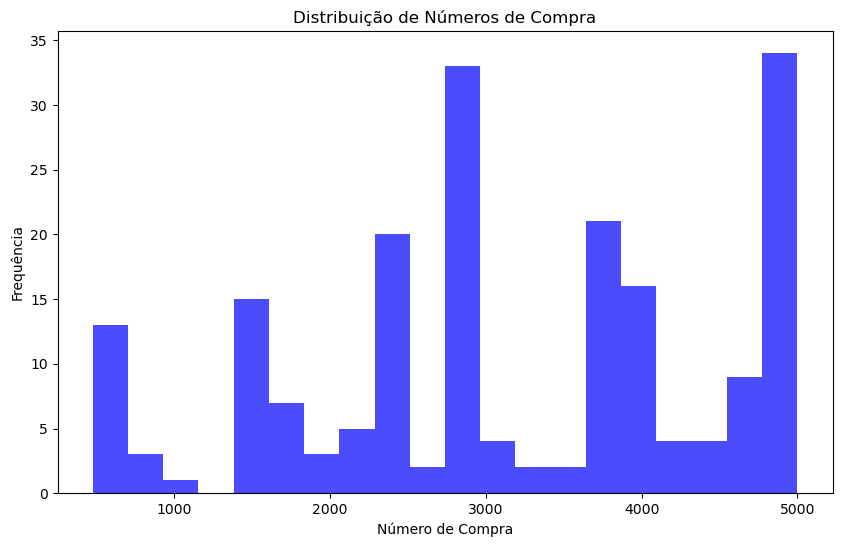

In [38]:
# Histograma para a coluna Numero_compra
plt.figure(figsize=(10, 6))
plt.hist(cliente_df['Numero_compra'], bins=20, color='blue', alpha=0.7)
plt.title('Distribuição de Números de Compra')
plt.xlabel('Número de Compra')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Gráfico de dispersão entre Numero_compra e Numero_entrega
plt.figure(figsize=(10, 6))
plt.scatter(cliente_df['Numero_compra'], cliente_df['Numero_entrega'], color='green', alpha=0.5)
plt.title('Relação entre Números de Compra e Números de Entrega')
plt.xlabel('Número de Compra')
plt.ylabel('Número de Entrega')
plt.show()

In [ ]:
# Boxplot para analisar a distribuição de Numero_compra por Categoria_produto
plt.figure(figsize=(12, 8))
sns.boxplot(x='Categoria_produto', y='Numero_compra', data=cliente_df)
plt.title('Distribuição de Numero_compra por Categoria_produto')
plt.xlabel('Categoria_produto')
plt.ylabel('Numero_compra')
plt.show()

In [ ]:
# Criar uma matriz de correlação
correlation_matrix = cliente_df.corr()

# Mapa de calor para visualizar a correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()

## Predição de Dados

In [ ]:
# Dividir dados em treinamento e teste
X = cliente_df[['Idade', 'Renda', 'Pontuacao_credito', 'Numero_compra']]
y = cliente_df['Categoria_produto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar modelo de classificação (Random Forest, neste caso)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
predictions = model.predict(X_test)

# Avaliar desempenho
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Imprimir relatório de classificação e matriz de confusão
print(classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Dividir dados em treinamento e teste
X = cliente_df[['Idade', 'Renda', 'Pontuacao_credito', 'Numero_compra', 'Tempo_entrega']]
y = cliente_df['Preco_venda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar modelo de regressão linear
model_preco = LinearRegression()
model_preco.fit(X_train, y_train)

# Fazer previsões nos dados de teste
predictions_preco = model_preco.predict(X_test)

# Avaliar desempenho
mse_preco = mean_squared_error(y_test, predictions_preco)
print(f'Mean Squared Error (Preco_venda): {mse_preco}')

# Visualizar previsões vs. valores reais
plt.scatter(y_test, predictions_preco)
plt.xlabel('Valores Reais (Preco_venda)')
plt.ylabel('Previsões (Preco_venda)')
plt.title('Regressão Linear: Valores Reais vs. Previsões (Preco_venda)')
plt.show()

In [ ]:
# Dividir dados em treinamento e teste (novamente, se necessário)
X_train_tempo, X_test_tempo, y_train_tempo, y_test_tempo = train_test_split(X, cliente_df['Tempo_entrega'], test_size=0.2, random_state=42)

# Criar e treinar modelo de regressão linear para o tempo de entrega
model_tempo = LinearRegression()
model_tempo.fit(X_train_tempo, y_train_tempo)

# Fazer previsões nos dados de teste
predictions_tempo = model_tempo.predict(X_test_tempo)

# Avaliar desempenho
mse_tempo = mean_squared_error(y_test_tempo, predictions_tempo)
print(f'Mean Squared Error (Tempo_entrega): {mse_tempo}')

# Visualizar previsões vs. valores reais
plt.scatter(y_test_tempo, predictions_tempo)
plt.xlabel('Valores Reais (Tempo_entrega)')
plt.ylabel('Previsões (Tempo_entrega)')
plt.title('Regressão Linear: Valores Reais vs. Previsões (Tempo_entrega)')
plt.show()